<a href="https://colab.research.google.com/github/jackqk/sklearn-note/blob/master/SVM(Support_Vector_Machine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine**

# **Linear SVM**



In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
this_C = 1.0

clf = SVC(kernel='linear', C=this_C).fit(X_train, y_train)
print('Accuracy of train set:{:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of test set:{:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of train set:0.80
Accuracy of test set:0.76


### 正则化

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

for this_C in [0.00001, 100]:
  clf = SVC(kernel='linear', C=this_C).fit(X_train, y_train)
  print('C={:.10f}'.format(this_C))
  print('Accuracy of train set:{:.2f}'.format(clf.score(X_train, y_train)))
  print('Accuracy of test set:{:.2f}'.format(clf.score(X_test, y_test)))

C=0.0000100000
Accuracy of train set:0.51
Accuracy of test set:0.40
C=100.0000000000
Accuracy of train set:0.80
Accuracy of test set:0.76


In [0]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer


(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True) 
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.94


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 多类别分类

In [0]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

fruits = pd.read_csv('https://raw.githubusercontent.com/Starignus/AppliedML_Python_Coursera/master/fruit_data_with_colors.txt', sep='\t')
X = fruits[['height', 'width']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = LinearSVC(C=5, random_state=67)
clf.fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

print('Accuracy of trainning set:{:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of test set:{:.2f}'.format(clf.score(X_test, y_test)))

Coefficients:
 [[-0.2632447   0.71355615]
 [-1.62923806  1.15817804]
 [ 0.03316693  0.28703901]
 [ 1.24224735 -1.63576356]]
Intercepts:
 [-3.2898795   1.19927347 -2.71574774  1.16108696]
Accuracy of trainning set:0.75
Accuracy of test set:0.47


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


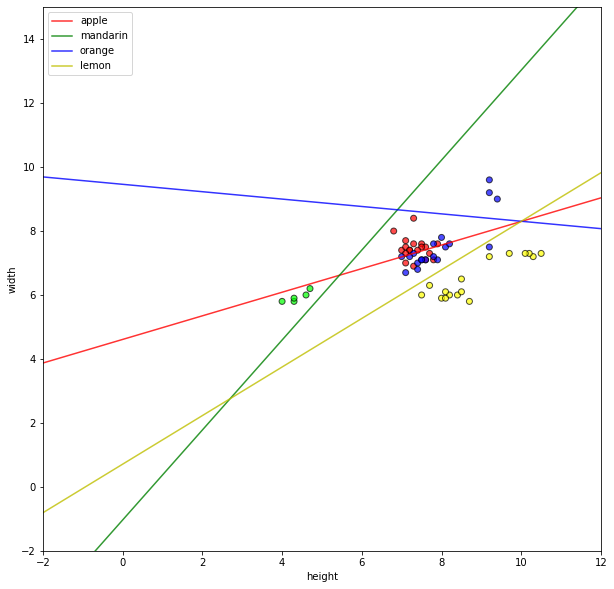

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10,10))
colors = ['r', 'g', 'b', 'y']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X['height'], X['width'], c=y, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

# **RBF SVM**

### 数据准备

In [0]:
from sklearn.datasets import make_blobs
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

for this_gamma in [0.01, 1.0, 10]:
  clf = SVC(kernel='rbf', gamma=this_gamma).fit(X_train, y_train)
  print('gamma={:.2f}'.format(this_gamma))
  print('Accuracy of trainning set:{:.2f}'.format(clf.score(X_train, y_train)))

gamma=0.01
Accuracy of trainning set:0.75
gamma=1.00
Accuracy of trainning set:0.95
gamma=10.00
Accuracy of trainning set:0.99
